In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel('/content/Retail_Customer_Segmentation.xlsx')

In [3]:
df=data.copy()

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       2011-10-26 12:46:00  1.25       14102.0     United Kingdom     8
572344     M          Manual                                48       2011-10-24 10:43:00  1.50       14607.0     United Kingdom     6
578289     23395      BELLE JARDINIERE CUSHION COVER        1        2011-11-23 14:07:00  3.75       17841.0     United Kingdom     6
                                                                                                                                   ..
553915     21174      POTTERING IN THE SHED METAL SIGN      12      

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

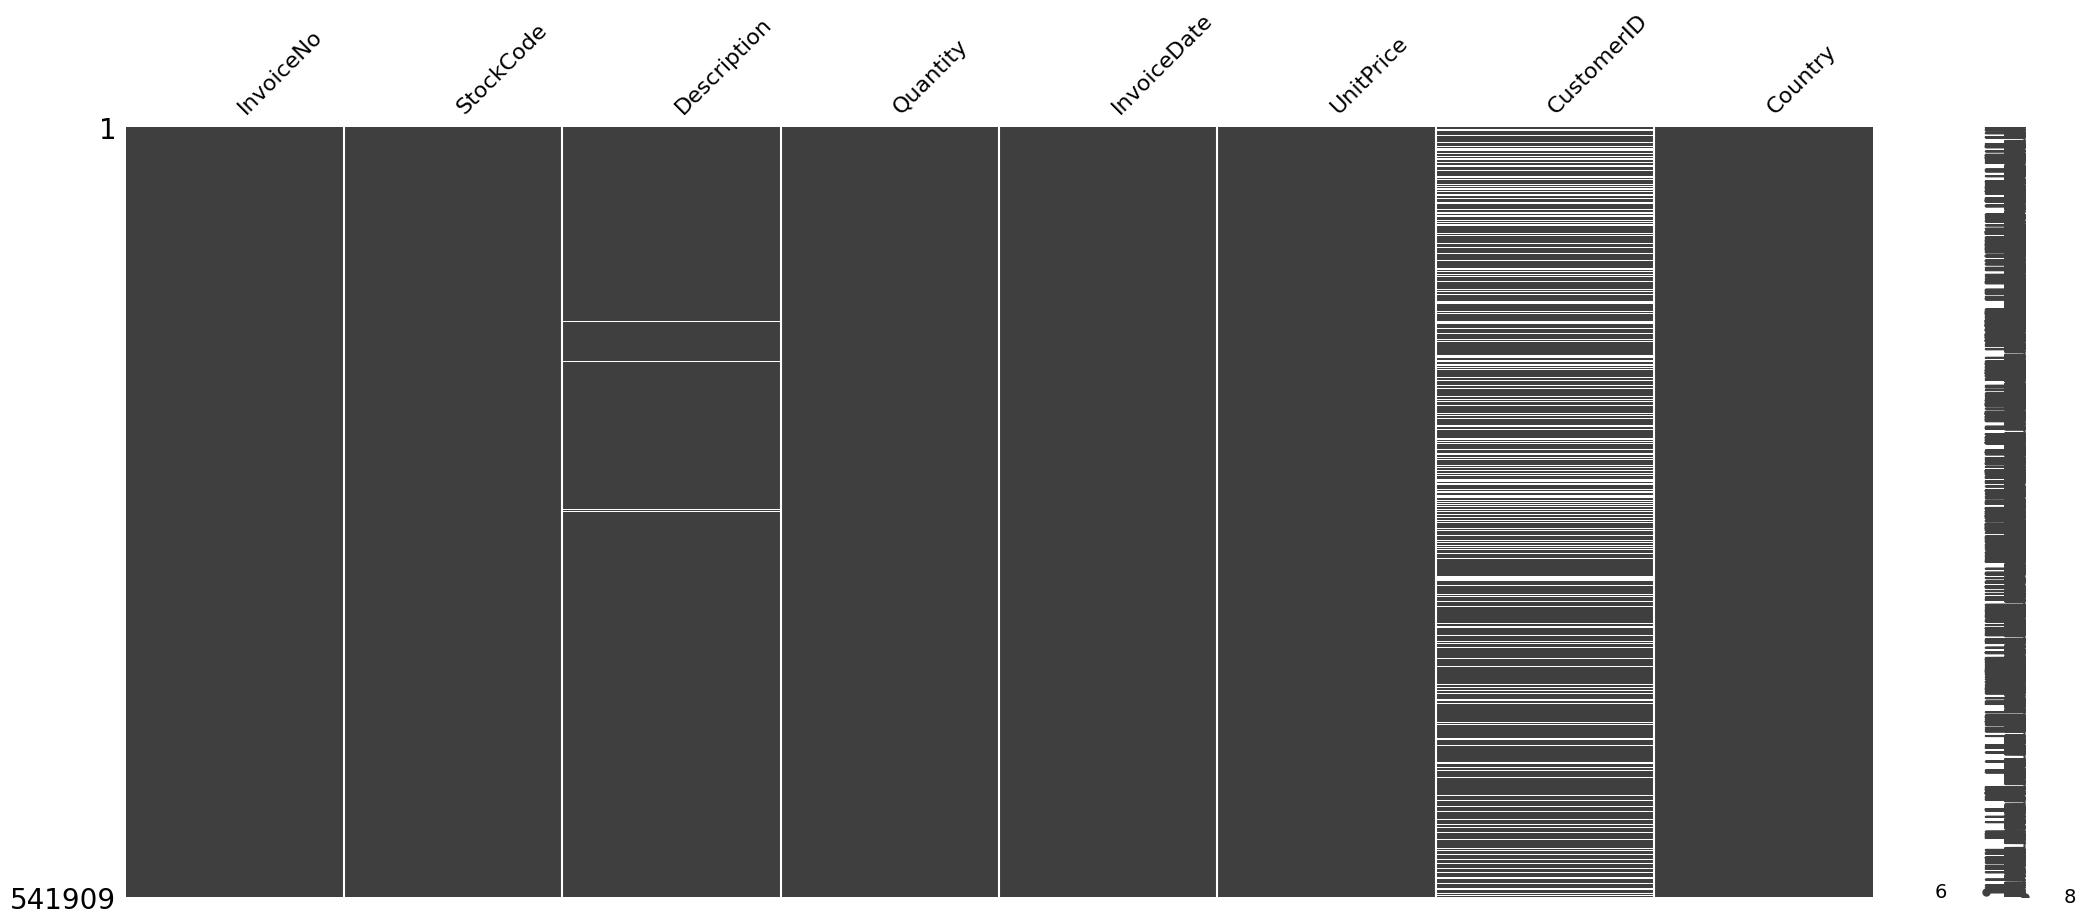

In [ ]:
#matrix map of missing values
import missingno as msno
msno.matrix(df)

# **Data Preprocessing:**

**Handling the missing values:**
About a quarter of Customer ID is missing, and 0.2% of product description. I will remove all of the rows with missing values as the CustomerID is integral to the analysis, and cannot contain missing values.

In [4]:
#removing missing values
df.dropna(inplace=True)

In [5]:
#resetting the index
df.reset_index(drop=True, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(406829, 8)

# **Checking Duplicate Values:**

In [17]:
duplicates_df = df.duplicated()
print("Number of duplicate values: ", duplicates_df.sum())

Number of duplicate values:  5225


In [ ]:
duplicates_df.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df[duplicates_df == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
duplicated_row = df[duplicates_df == True].iloc[0]
print(duplicated_row)

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate            2010-12-01 11:45:00
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object


# **Handling the unusual data:**

In [6]:
df.Quantity.value_counts()

 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

In [7]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [8]:
df[df['Quantity'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3645,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
3740,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
3741,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
4286,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
10946,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
402106,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom
403246,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
405998,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
405999,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [9]:
df[df['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28939,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain
45380,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain
78283,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE
78284,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE
78285,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE
78286,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE
99563,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
99565,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore
99566,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
99568,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore


It seems that there are almost 9k negative quantity, but quantity cannot be negative.

In [10]:
def col_value_counts(df):
    col=df.drop(columns=['InvoiceNo']).columns
    for i in col:
        print(i+':')
        print(df[i].value_counts())
        print('-'* 50)

col_value_counts(df)

StockCode:
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
84620        1
90038B       1
84551        1
84614A       1
20957        1
Name: StockCode, Length: 3684, dtype: int64
--------------------------------------------------
Description:
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64
--------------------------------------------------
Quantity:
 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408    

In [11]:
import re

# Define a regular expression pattern to match strings
pattern = re.compile('[A-Za-z]+')

# Apply the pattern to the 'StockCode' column and extract only the matches
unique_strings = df['StockCode'].apply(lambda x: ''.join(pattern.findall(str(x))))

# Assuming unique_strings is the Series containing unique strings
unique_SC = unique_strings.value_counts().reset_index()

# Rename the columns
unique_SC.columns = ['Categories', 'Count']

# Display the resulting DataFrame
unique_SC

,Categories,Count
0,,371020
1,B,9118
2,A,8498
3,C,4305
4,D,2419
5,L,1718
6,E,1564
7,F,1365
8,S,1273
9,POST,1196


In [12]:
import pandas as pd
import re

# Define a regular expression pattern to match strings
pattern = re.compile('[A-Za-z]+')

# Apply the pattern to the 'StockCode' column and extract only the matches
unique_strings = df['StockCode'].apply(lambda x: ''.join(pattern.findall(str(x))))

# Compute the frequency of each unique string and reset the index
unique_SC = unique_strings.value_counts().reset_index()

# Rename the columns
unique_SC.columns = ['Categories', 'Count']

# Merge with the 'Description' column
unique_SC = unique_SC.merge(df[['StockCode', 'Description']], left_on='Categories', right_on='StockCode', how='left').drop_duplicates()

# Drop the redundant 'StockCode' column
unique_SC.drop(columns='StockCode', inplace=True)

# Display the resulting DataFrame
unique_SC


,Categories,Count,Description
0,,371020,NaN
1,B,9118,NaN
2,A,8498,NaN
3,C,4305,NaN
4,D,2419,Discount
81,L,1718,NaN
82,E,1564,NaN
83,F,1365,NaN
84,S,1273,NaN
85,POST,1196,POSTAGE


# **Removing Unusual StockCode:**

In [13]:
# Description : counting Manual, Discount,POSTAGE...
count_manual = (df['Description']=='Manual').sum()
count_discount = (df['Description']=='Discount').sum()
count_post = (df['Description']=='POSTAGE').sum()
count_cruk = (df['Description']=='CRUK Commission').sum()
count_dot = (df['Description']=='DOTCOM POSTAGE').sum()

print('Sum of value manual: ',count_manual)
print('Sum of value discount: ',count_discount)
print('Sum of value postage: ',count_post)
print('Sum of value cruk commission: ',count_cruk)
print('Sum of value dotcom postage: ',count_dot)

Sum of value manual:  465
Sum of value discount:  77
Sum of value postage:  1196
Sum of value cruk commission:  16
Sum of value dotcom postage:  16


In [14]:
#StockCode feature: finding the count of values that have a len less than 5 (which is a standard stockcode length)
#length of the values in the 'StockCode' column with less than 5 character does not match the 'StockCode' convention.
df_less_5 = df[df['StockCode'].str.len() < 5]
df_less_5.value_counts('StockCode')

StockCode
POST    1196
M        465
C2       134
D         77
CRUK      16
DOT       16
PADS       4
dtype: int64

In [15]:
#removing rows with StockCode values that have len less than 5
unusual_data = df['StockCode'].isin(['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS'])
#keeping the rows with True in the mask
df = df[~unusual_data]
print(df.shape)

(404921, 8)


In [16]:
df['StockCode'].isin(['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS']).sum()

0

In [17]:
df[df['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Checking the huge  values in Quantity:**

In [18]:
#checking the huge negative value in Quantity
df[df['Quantity'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
406350,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [19]:
df[df['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
378894,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
406349,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


It seems there occured errors during a purchase of specific items such as PAPER CRAFT , LITTLE BIRDIE. My assumption is that the customer made a mistake when choosing the quantity, or they changed their mind and returned the product. Both the purchased quantity(positive value), and the returned quantity(negative value) remain in the dataset. The total will come up to zero during feature engineering. So, I decided to leave these outliers in the data, unless further analysis shows they need to be removed if my assumptions were incorrect.

# **Feature Engineering:**

# **RFM Analysis(Recency, Frequency, Monetary Value):**

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Recency:**

In [20]:
#converting the date feature to a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#setting the reference date to the latest date of the analysis
reference_date= df['InvoiceDate'].max()

#grouping data by customer and getting the latest purchase date for each customer
grouped_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#calculatingthe recency for each customer by subtracting the most recent purchase date from the reference date
grouped_df['Recency'] = (reference_date - grouped_df['InvoiceDate']).dt.days

#merging the recency value to the dataframe
df = df.merge(grouped_df[['CustomerID', 'Recency']], on='CustomerID', how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301
...,...,...,...,...,...,...,...,...,...
404916,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
404917,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
404918,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
404919,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


# **Frequency:**

In [21]:
#calculating the frequency for each customer by counting the number of purchases
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count()

#merging the frequency value to the dataframe
df = pd.merge(df,frequency_df, on='CustomerID', how='left')
df.rename(columns={'InvoiceNo_x':'InvoiceNo', 'InvoiceNo_y':'Frequency'}, inplace=True)

# **Monetory Value:**

In [22]:
#calculating the monetary value for each customer
monetary_value_df = df.groupby('CustomerID')['UnitPrice'].sum()

#merging the monetary value to the dataframe
df = df.merge(monetary_value_df, on='CustomerID', how='left')
df.rename(columns={'UnitPrice_x':'UnitPrice', 'UnitPrice_y':'MonetaryValue'}, inplace=True)

# **Customer Segmentation using RFM  scores:**
The customers are grouped into different segments based on their RFM level, and calculate the mean values for recency, frequency, and monetary value for each segment. The result I get is a summary table that provides us with valuable insights into the behavior of each segment of customers.Customers with higher RFM scores are typically more valuable or active.

In [23]:
#normalizing the values
r_quartile = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])
f_quartile = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])
m_quartile = pd.qcut(df['MonetaryValue'], 4, labels=[1, 2, 3, 4])
df['RFM_Score'] = r_quartile.astype(int) + f_quartile.astype(int) + m_quartile.astype(int)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7
...,...,...,...,...,...,...,...,...,...,...,...,...
404916,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,49,135.17,6
404917,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,49,135.17,6
404918,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6
404919,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6


In [24]:
def assign_rfm_level(row):
    """
    Assigns the RFM level based on the RFM score.

    Parameters:
    row (Series): Row of the DataFrame containing RFM Score.

    Returns:
    str: RFM level category.
    """
    rfm_score = row['RFM_Score']

    if rfm_score >= 10:
        return 'Best Customers'
    elif rfm_score >= 6:
        return 'Loyal Customers'
    elif rfm_score >= 4:
        return 'Potential Loyalists'
    elif rfm_score >= 2:
        return 'Promising'
    else:
        return 'Needs Attention'

# Apply the function to each row of the DataFrame
df['RFM_Level'] = df.apply(assign_rfm_level, axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404916,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,49,135.17,6,Loyal Customers
404917,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,49,135.17,6,Loyal Customers
404918,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6,Loyal Customers
404919,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6,Loyal Customers


# **Visualizing the RFM Level customers using a bar plot:**

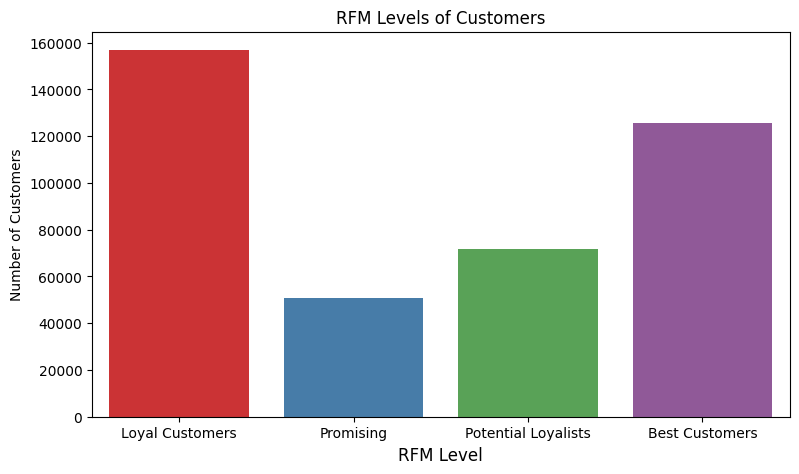

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))  # Set the size of the figure

# Create a count plot to visualize the number of customers per RFM level
sns.countplot(data=df, x='RFM_Level', hue='RFM_Level', palette='Set1', legend=False)

plt.xlabel('RFM Level', fontsize=12)  # Set label for x-axis
plt.ylabel('Number of Customers')      # Set label for y-axis
plt.title('RFM Levels of Customers')   # Set title of the plot
plt.show()                             # Display the plot
                            # Display the plot


In [26]:
#segmenting customers
segmented_customers = df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})
segmented_customers

Recency    Frequency MonetaryValue        
                           mean         mean          mean   count
RFM_Level                                                         
Best Customers         4.432232  1815.432773   5244.151497  125627
Loyal Customers       23.216174   223.244631    614.814420  156832
Potential Loyalists   58.865942    87.589062    245.280141   71894
Promising            146.128263    41.723620    115.478936   50568

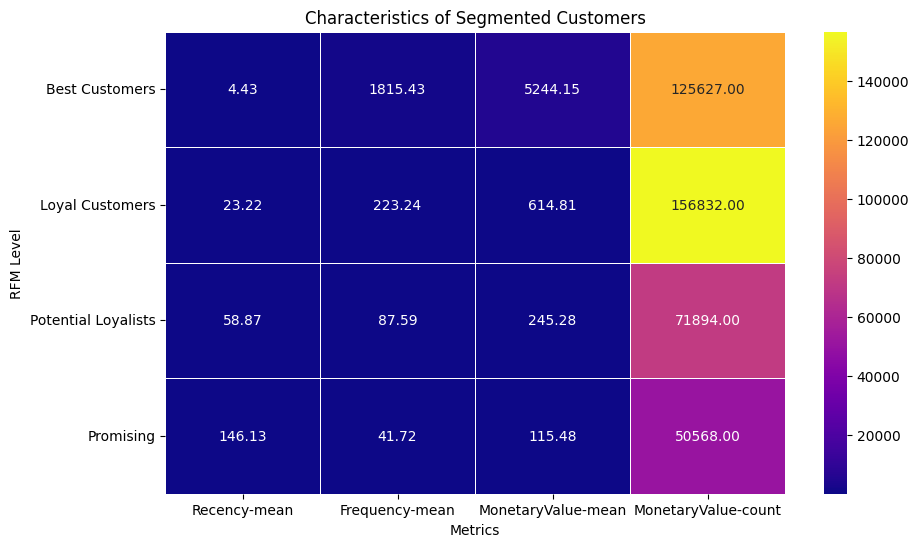

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using sns.heatmap with the 'viridis' colormap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_customers, cmap='plasma', annot=True, fmt='.2f', linewidths=.5)
plt.title('Characteristics of Segmented Customers')
plt.xlabel('Metrics')
plt.ylabel('RFM Level')
plt.show()

**INTERPRETATION:**

"Loyal Customers" have higher mean values for "MonetaryValue" compared to other segments, it suggests that targeting strategies should focus more on retaining these high-value customers.

 In the context of RFM (Recency, Frequency, MonetaryValue) analysis, lower recency is generally considered better. So, it is better to follow up to the "Promising", "Potential Loyalists", and 'Loyal Customers' with freqent emails and mails about the promotion/deal of products.

# **Comparing the trends or differences in mean values of RFM metrics across different RFM levels:**

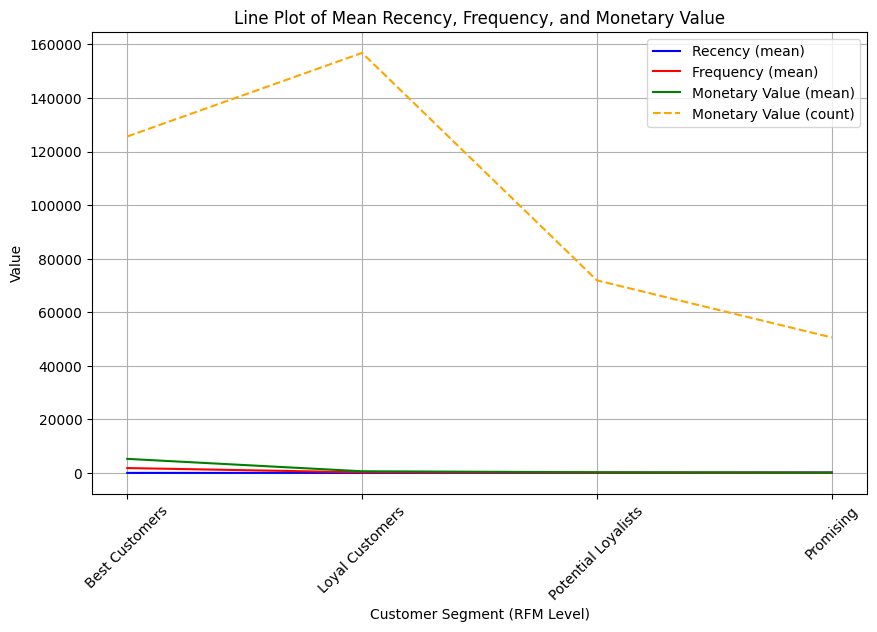

In [27]:
import matplotlib.pyplot as plt

# Assuming 'segmented_customers' contains the segmented customer data

# Extract mean and count values for Recency, Frequency, and MonetaryValue
recency_mean = segmented_customers.loc[:, ('Recency', 'mean')]
frequency_mean = segmented_customers.loc[:, ('Frequency', 'mean')]
monetary_value_mean = segmented_customers.loc[:, ('MonetaryValue', 'mean')]
monetary_value_count = segmented_customers.loc[:, ('MonetaryValue', 'count')]

# Create line plots
plt.figure(figsize=(10, 6))

# Plot mean values
plt.plot(recency_mean, c='blue', label='Recency (mean)')
plt.plot(frequency_mean, c='red', label='Frequency (mean)')
plt.plot(monetary_value_mean, c='green', label='Monetary Value (mean)')

# Plot count values (using a different linestyle)
plt.plot(monetary_value_count, c='orange', linestyle='--', label='Monetary Value (count)')

# Add labels and title
plt.xlabel('Customer Segment (RFM Level)')
plt.ylabel('Value')
plt.title('Line Plot of Mean Recency, Frequency, and Monetary Value')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
plt.show()

**INTERPRETATION:**

Higher mean Recency indicates that customers in that segment made purchases less recently.

Higher mean Frequency indicates that customers in "Best Customers" segment make purchases more frequently.

Higher mean Monetary Value indicates that customers the "Loyal Customer" segment spend more on average.

Insights for Business Strategy:

Based on the plot, the following business strategiesshould be adopted:

Targeting marketing efforts towards segments with high mean Frequency (best Customer) and Monetary Value (Loyal Customer) to retain and upsell to valuable customers.

Implementing re-engagement strategies for "Potential Loyalties" and "Promising" customers with low mean Recency to reactivate inactive customers.

# **Product Segmentation using the K-Means clustering:**

In [28]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Tokenize the product descriptions
df['Tokenized_Description'] = df['Description'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Tokenized_Description'] = df['Tokenized_Description'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Perform stemming
stemmer = PorterStemmer()
df['Tokenized_Description'] = df['Tokenized_Description'].apply(lambda x: [stemmer.stem(word) for word in x])

# Perform word frequency analysis
df['Word_Counts'] = df['Tokenized_Description'].apply(Counter)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':..."
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404916,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,49,135.17,6,Loyal Customers,"[pack, 20, spaceboy, napkin]","{'pack': 1, '20': 1, 'spaceboy': 1, 'napkin': 1}"
404917,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,49,135.17,6,Loyal Customers,"[children, 's, apron, dolli, girl]","{'children': 1, ''s': 1, 'apron': 1, 'dolli': ..."
404918,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6,Loyal Customers,"[children, cutleri, dolli, girl]","{'children': 1, 'cutleri': 1, 'dolli': 1, 'gir..."
404919,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,49,135.17,6,Loyal Customers,"[children, cutleri, circu, parad]","{'children': 1, 'cutleri': 1, 'circu': 1, 'par..."


# **Text Vectorization:**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([' '.join(x) for x in df['Tokenized_Description']])

# **Selecting the optimal no of clusters using the Elbow Method:**

The Elbow Method is a heuristic used to determine the optimal number of clusters in a dataset for clustering algorithms such as K-means. It works by plotting the within-cluster sum of squared distances (WCSS) against the number of clusters, and identifying the "elbow" point in the plot where the rate of decrease in WCSS slows down.

Here's how you can implement the Elbow Method for determining the optimal number of clusters using K-means clustering:

Compute K-means clustering for a range of cluster numbers.

For each clustering, calculate the sum of squared distances of samples to their closest cluster center (WCSS).

Plot the number of clusters against the WCSS.

Identify the "elbow" point in the plot, where the rate of decrease in WCSS slows down. This point represents the optimal number of clusters.

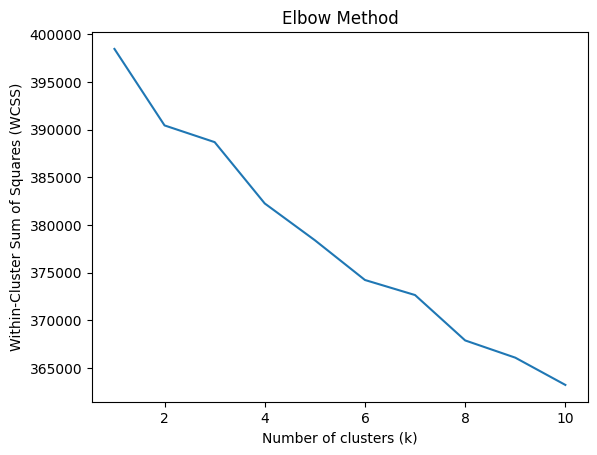

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []

# Iterate over a range of values for the number of clusters (k)
for k in range(1, 11):
    # Initialize and fit KMeans clustering algorithm for the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)

    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method visualization
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# **Display the Elbow Method visualization:**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

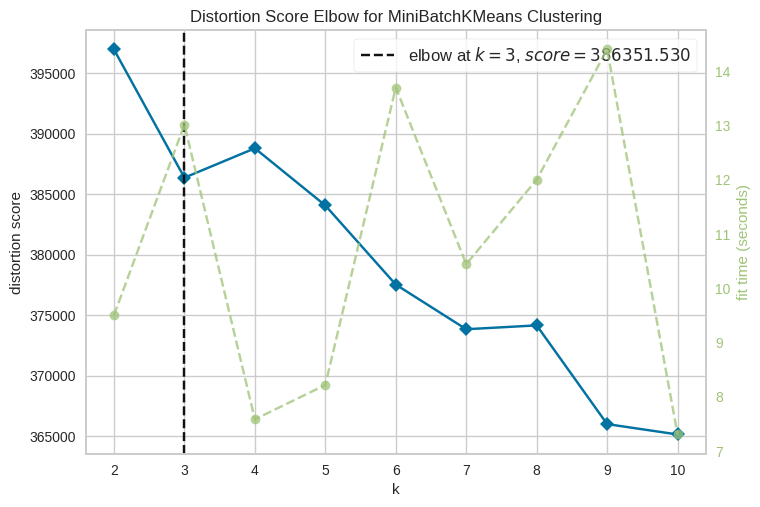

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import csr_matrix


# Convert the TF-IDF matrix to a dense numpy array
tfidf_array = tfidf_matrix.toarray()

# Create an instance of MiniBatchKMeans clustering algorithm
kmeans = MiniBatchKMeans()

# Create an instance of KElbowVisualizer with MiniBatchKMeans clustering algorithm and specify the range of k values
elbow_method = KElbowVisualizer(kmeans, k=10)

# Fit the visualizer on the TF-IDF matrix (converted to a dense numpy array)
elbow_method.fit(tfidf_array)

# Display the Elbow Method visualization
elbow_method.show()

# **Using the KMeans algorithm to cluster the data into three clusters:**

In [39]:
#clustering the reduced features
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tfidf_matrix)
df['Product_Cluster'] = kmeans.predict(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts,Product_Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':...",2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}",0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1...",2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '...",0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1...",2


# **Visualizing the Product Category Clusters:**

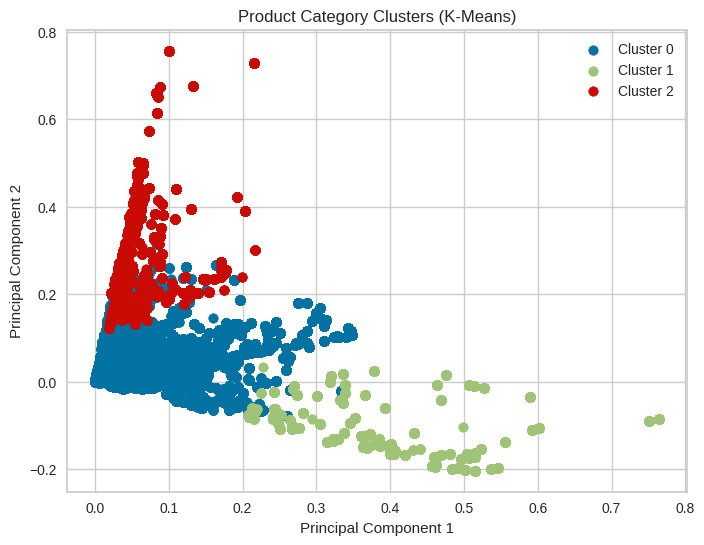

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reduce the dimensionality of the TF-IDF matrix using TruncatedSVD
svd = TruncatedSVD(n_components=2)
tfidf_svd = svd.fit_transform(tfidf_matrix)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming you have 3 clusters
    plt.scatter(tfidf_svd[df['Product_Cluster'] == cluster, 0],
                tfidf_svd[df['Product_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Category Clusters (K-Means)')
plt.legend()
plt.show()

Interpretation:

-Cluster Distribution: The scatter plot shows the distribution of data points (products) in the reduced two-dimensional space.
Each point represents a product, and its position on the plot is determined by its two principal components obtained from TruncatedSVD.

-Cluster Separation: The distinct colors represent different product category clusters.
Points that are closer together in the plot are more similar in terms of their TF-IDF representations.

-Cluster Interpretation: Products within the same cluster are expected to share similar characteristics or descriptions, as they are grouped together by the K-means algorithm.

-Cluster Insights:
Clusters that are well-separated in the plot indicate clear distinctions between product categories based on their descriptions.
Overlapping clusters suggest similarities or ambiguities in the descriptions of products within those clusters.

# **Customer Segmentation using Unsupervised Learning:**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404921 entries, 0 to 404920
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              404921 non-null  object        
 1   StockCode              404921 non-null  object        
 2   Description            404921 non-null  object        
 3   Quantity               404921 non-null  int64         
 4   InvoiceDate            404921 non-null  datetime64[ns]
 5   UnitPrice              404921 non-null  float64       
 6   CustomerID             404921 non-null  float64       
 7   Country                404921 non-null  object        
 8   Recency                404921 non-null  int64         
 9   Frequency              404921 non-null  int64         
 10  MonetaryValue          404921 non-null  float64       
 11  RFM_Score              404921 non-null  int64         
 12  RFM_Level              404921 non-null  obje

# **Selecting numeric features only:**

K-means clustering assumes that the data points are represented as numeric vectors in a continuous feature space.

Since Categorical or textual data may not adhere to this assumptions and may require additional preprocessing or transformation before being used with
K-means clustering, we only consider the numeric variables for the K-means clustering.

In [47]:
features = ['Quantity', 'UnitPrice', 'Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'Product_Cluster']
X = df[features]

In [49]:
from sklearn.preprocessing import StandardScaler

#scaling data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(3, svd_solver = 'full')
pca.fit(X_scaled)
lowdim_X = pca.transform(X_scaled)

In [53]:
lowdim_X

array([[-1.69380463,  0.23398557, -3.64143305],
       [-1.69801211,  2.00011618, -2.0863442 ],
       [-1.69406612,  0.26048512, -3.62624983],
       ...,
       [-0.5241263 ,  0.08035765,  0.78392422],
       [-0.5241263 ,  0.08035765,  0.78392422],
       [-0.52507171,  0.19076462,  0.84557701]])

In [56]:
#converting lowdim_X into a dataframe
columns = ['principal_comp_%d' % i for i in range(1,4)]
X_pca  = pd.DataFrame(lowdim_X, columns = columns)
X_pca.head()

,principal_comp_1,principal_comp_2,principal_comp_3
0,-1.693805,0.233986,-3.641433
1,-1.698012,2.000116,-2.086344
2,-1.694066,0.260485,-3.626250
3,-1.698012,2.000116,-2.086344
4,-1.694809,0.349399,-3.576805


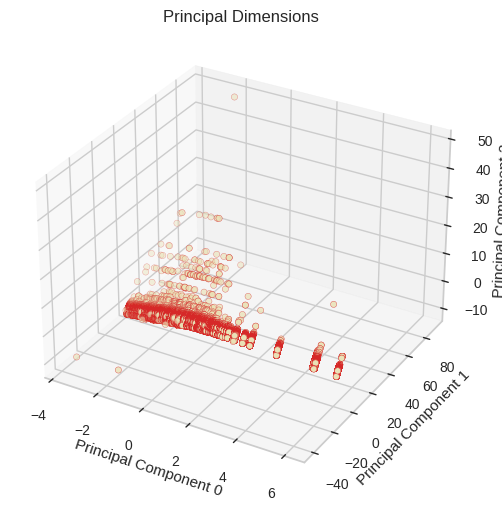

In [61]:
# #visualizing X_pca in 3D
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca['principal_comp_1'], X_pca['principal_comp_2'], X_pca['principal_comp_3'],
           s = 20, c = '#eae2b7', edgecolors = '#d62828')
ax.set_xlabel('Principal Component 0')
ax.set_ylabel('Principal Component 1')
ax.set_zlabel('Principal Component 2')
ax.set_title('Principal Dimensions')
plt.show();

# **Selecting the optimal no of clusters for Customer segmentation using The elbow method:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

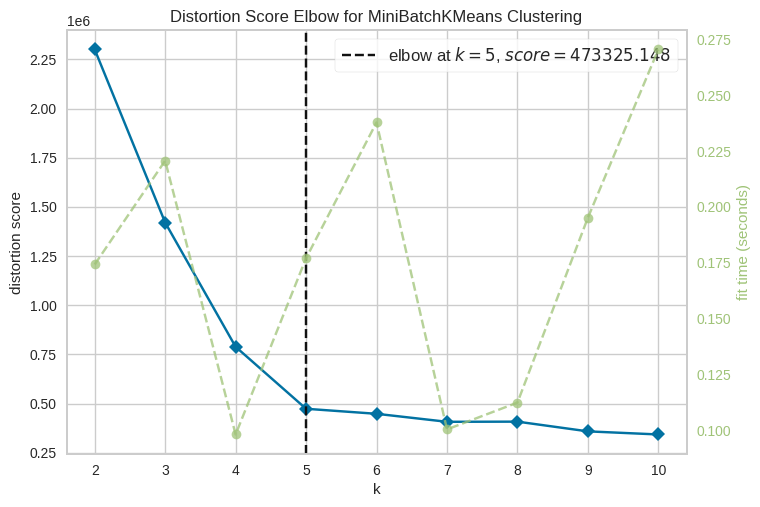

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer

# Create an instance of MiniBatchKMeans clustering algorithm
kmeans_mini = MiniBatchKMeans()

# Create an instance of KElbowVisualizer with MiniBatchKMeans clustering algorithm and specify the range of k values
elbow_method_mini = KElbowVisualizer(kmeans_mini, k=10)

# Fit the visualizer on the PCA-transformed data
elbow_method_mini.fit(X_pca)

# Display the Elbow Method visualization
elbow_method_mini.show()

# **Using the KMeans algorithm to cluster the customer data into 5 clusters:**

In [82]:
#performing k-means clustering
kmeans = KMeans(n_clusters = 5)
kmeans_pred = kmeans.fit_predict(X_pca)
kmeans_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [83]:
# add predicted clusters for each data point into dataframe
df['Customer Cluster']= kmeans_pred

# add predicted clusters for each data point into reduced dimension data
X_pca['Customer Cluster'] = kmeans_pred

In [86]:
X_pca.head()

,principal_comp_1,principal_comp_2,principal_comp_3,Customer Cluster
0,-1.693805,0.233986,-3.641433,3
1,-1.698012,2.000116,-2.086344,3
2,-1.694066,0.260485,-3.626250,3
3,-1.698012,2.000116,-2.086344,3
4,-1.694809,0.349399,-3.576805,3


In [87]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts,Product_Cluster,Customer Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':...",2,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}",0,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1...",2,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '...",0,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1...",2,3


<ipython-input-88-ebd1a8ca8ebb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(X_pca, x = 'Customer Cluster',palette='Set1')


<Axes: xlabel='Customer Cluster', ylabel='count'>

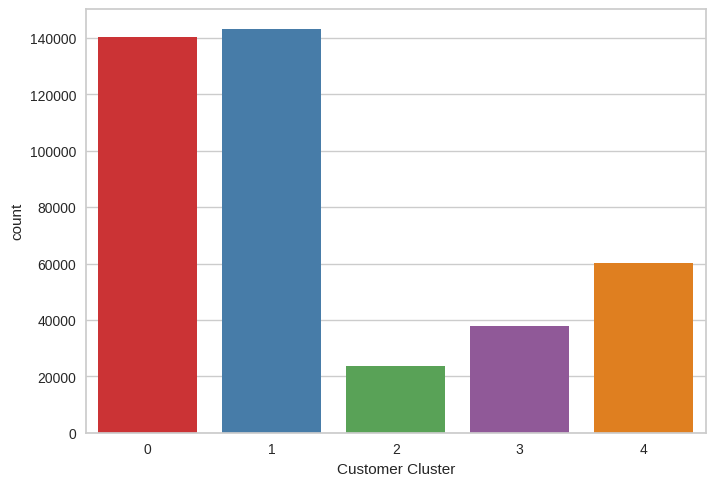

In [88]:
#checking out the count per cluster
sns.countplot(X_pca, x = 'Customer Cluster',palette='Set1')

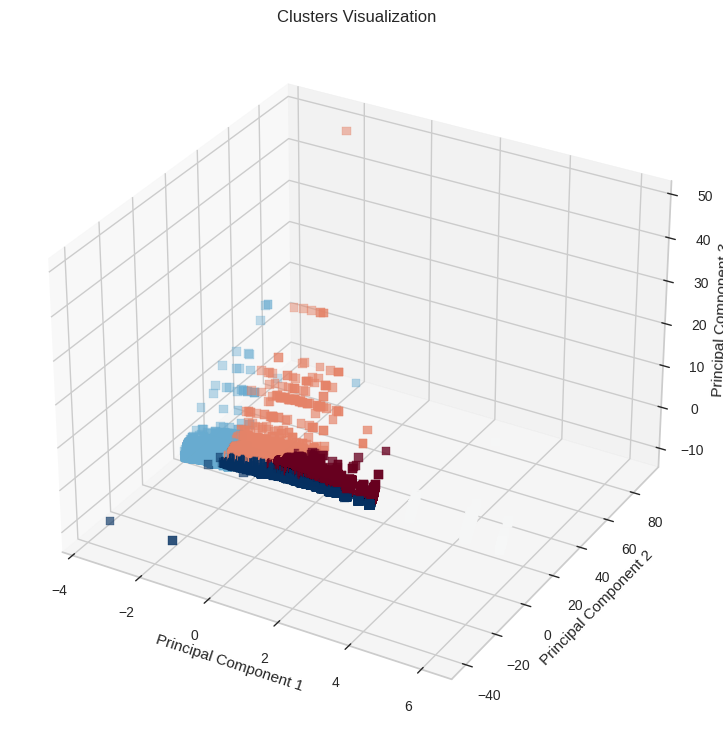

In [89]:
#visualizing clusterd reduced dimension data in 3D
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
x = np.array(X_pca['principal_comp_1'])
y = np.array(X_pca['principal_comp_2'])
z = np.array(X_pca['principal_comp_3'])

ax.scatter(x,y,z, marker = 's', c = X_pca['Customer Cluster'], s = 40, cmap="RdBu")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clusters Visualization')
plt.show()

# # **Plotting the pairwise scatterplot matrix for the columns 'MonetaryValue', 'Frequency', and 'Recency' from the original DataFrame, with each scatterplot colored by the 'Customer Cluster' column:**

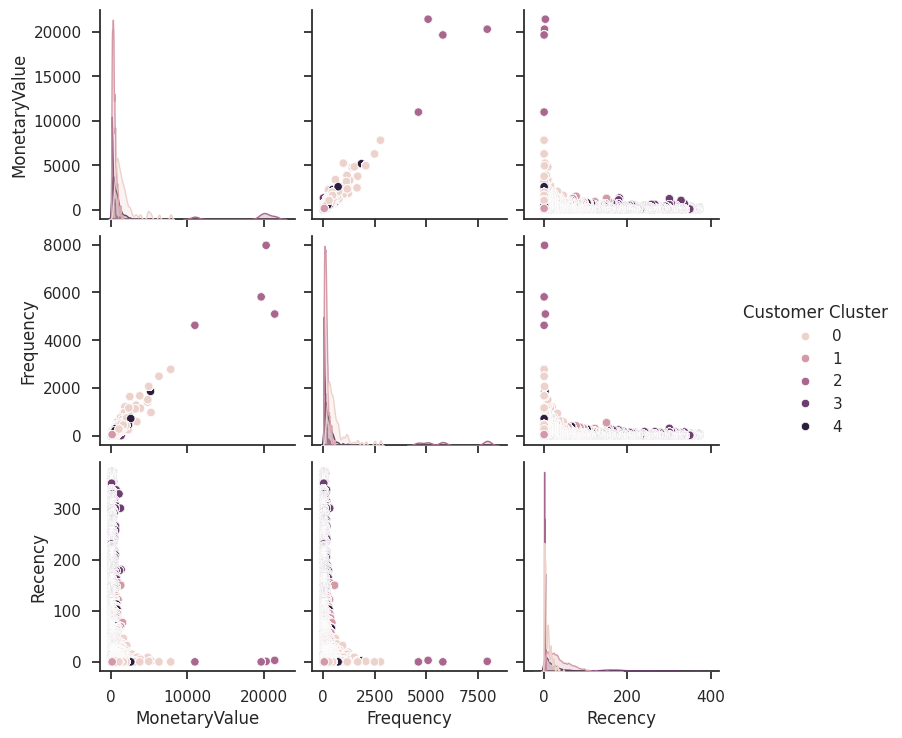

In [93]:
sns.set(style='ticks')
sns.pairplot(df[['MonetaryValue', 'Frequency', 'Recency', 'Customer Cluster']], hue = 'Customer Cluster')